In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [5]:
# Download Apple stock data from Yahoo Finance
df = yf.download('AAPL', start='2022-01-01', end='2025-01-01')

# Display first few rows
print(df.head())


C:\Users\batch_oulh163\AppData\Local\Temp\ipykernel_8196\477456042.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2022-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645660  179.499589  174.425155  174.542932  104487900
2022-01-04  176.378372  179.558489  175.809091  179.254221   99310400
2022-01-05  171.686691  176.839648  171.411868  176.290001   94537600
2022-01-06  168.820724  172.059730  168.467378  169.507783   96904000
2022-01-07  168.987564  170.921151  167.868637  169.694257   86709100


In [6]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df['Next_Close'] = df['Close'].shift(-1)
df.dropna(inplace=True)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']
print(X.head())
print(y.head())


Price             Open        High         Low     Volume
Ticker            AAPL        AAPL        AAPL       AAPL
Date                                                     
2022-01-03  174.542932  179.499589  174.425155  104487900
2022-01-04  179.254221  179.558489  175.809091   99310400
2022-01-05  176.290001  176.839648  171.411868   94537600
2022-01-06  169.507783  172.059730  168.467378   96904000
2022-01-07  169.694257  170.921151  167.868637   86709100
Date
2022-01-03    176.378372
2022-01-04    171.686691
2022-01-05    168.820724
2022-01-06    168.987564
2022-01-07    169.007156
Name: Next_Close, dtype: float64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)


In [10]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 13.92


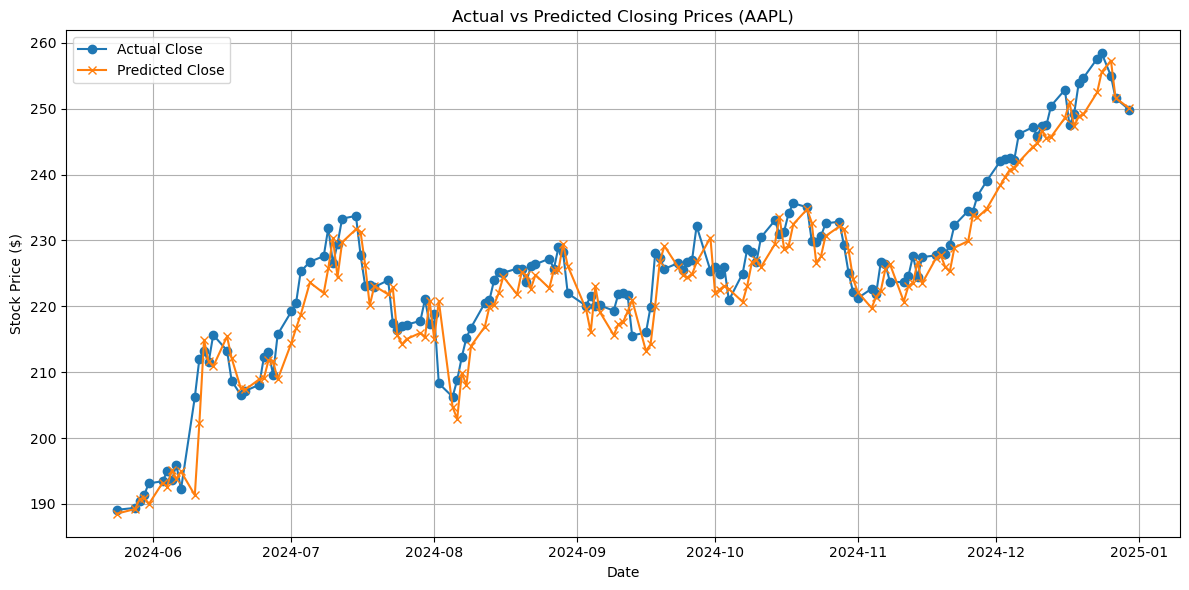

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label="Actual Close", marker='o')
plt.plot(y_test.index, y_pred, label="Predicted Close", marker='x')
plt.title("Actual vs Predicted Closing Prices (AAPL)")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
